In [8]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import os
import openai
import numpy as np
import ipdb
import re
from tqdm import tqdm

from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
import spacy
import scipy

nlp = spacy.load("en_core_web_sm")
openai.api_key= os.environ['OPENAI_KEY']
pd.set_option('max_rows',500,'max_colwidth',1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data_name = 'bc5cdr_disease'
seed = 42
few_shot_num = 5
number_of_test_samples = 50
selection_strategy = 'random'
sep = ', '
engine='davinci'

prompt_filename = '../data/{}_test_prompts_{}_{}.{}.{}.{}'.format(data_name, selection_strategy,seed,few_shot_num,number_of_test_samples,sep)
filename_root = prompt_filename.split('/')[-1]
test_ready_prompt_dataset = pickle.load(open(prompt_filename,'rb'))

In [27]:
data_name = 'ddi'
seed = 42
few_shot_num = 5
number_of_test_samples = 50
selection_strategy = 'random'
sep=None
engine='davinci'
permutation = 0
verbalizer = ''

prompt_filename = '../data/{}_test_prompts_{}_{}.{}.{}.perm_{}.{}'.format(data_name, selection_strategy,seed,few_shot_num,number_of_test_samples,permutation,verbalizer)
filename_root = prompt_filename.split('/')[-1]
test_ready_prompt_dataset = pickle.load(open(prompt_filename,'rb'))

FileNotFoundError: [Errno 2] No such file or directory: '../data/ddi_test_prompts_random_42.5.50.perm_0.'

In [28]:
prompt_filename = '../data/ddi_test_prompts_random_42.5.50.perm_4.KNN'
test_ready_prompt_dataset = pickle.load(open(prompt_filename,'rb'))

In [29]:
test_ready_prompt_dataframe = test_ready_prompt_dataset['test_df']
prompts = test_ready_prompt_dataframe.test_ready_prompt.values

In [30]:
prompt_filename

'../data/ddi_test_prompts_random_42.5.50.perm_4.KNN'

In [31]:
test_ready_prompt_dataframe

,Unnamed: 0,index,sentence,label,doc,split,entity1,entity2,prompts,empty_prompts,labels,unique_labels,test_ready_prompt
1065,4386,DDI-DrugBank.d48.s12.p2,The concomitant use of H2 blockers or proton pump inhibitors with SPRYCEL is not recommended.,DDI-advise,DDI-DrugBank.d48,dev,proton pump inhibitors,SPRYCEL,Sentence: The concomitant use of H2 blockers or proton pump inhibitors with SPRYCEL is not recommended.\nDrug 1: proton pump inhibitors\nDrug 2: SPRYCEL\nInteraction: advice,Sentence: The concomitant use of H2 blockers or proton pump inhibitors with SPRYCEL is not recommended.\nDrug1: proton pump inhibitors\nDrug2: SPRYCEL\nInteraction:,advice,"{effect, other, mechanism, none, advice}",Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.\nDrug 1: antacids\nDrug 2: H2 blockers\nInteraction: none\n\nSentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.\nDrug 1: antacids\nDrug 2: proton pump inhibitors\nInteraction: none\n\nSentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.\nDrug 1: antacids\nDrug 2: SPRYCEL\nInteraction: none\n\nSentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.\nDrug 1: H2 blockers\nDrug 2: proton pump inhibitors\nInteraction: none\n\nSentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.\nDrug 1: H2 blockers\nDrug 2: S...
1157,17780,DDI-DrugBank.d31.s0.p0,MAO inhibitors should be used with caution in patients receiving hydralazine.,DDI-advise,DDI-DrugBank.d31,dev,MAO inhibitors,hydralazine,Sentence: MAO inhibitors should be used with caution in patients receiving hydralazine.\nDrug 1: MAO inhibitors\nDrug 2: hydralazine\nInteraction: advice,Sentence: MAO inhibitors should be used with caution in patients receiving hydralazine.\nDrug1: MAO inhibitors\nDrug2: hydralazine\nInteraction:,advice,"{effect, other, mechanism, none, advice}","Sentence: Cevimeline should be administered with caution to patients taking beta adrenergic antagonists, because of the possibility of conduction disturbances.\nDrug 1: Cevimeline\nDrug 2: beta adrenergic antagonists\nInteraction: advice\n\nSentence: All vasopressors should be used cautiously in patients taking monoamine oxidase (MAO) inhibitors.\nDrug 1: vasopressors\nDrug 2: monoamine oxidase (MAO) inhibitors\nInteraction: advice\n\nSentence: DISULFIRAM SHOULD BE USED WITH CAUTION IN THOSE PATIENTS REVEIVING PHENYTOIN AND ITS CONGENERS.\nDrug 1: DISULFIRAM\nDrug 2: PHENYTOIN\nInteraction: advice\n\nSentence: NSAIDs should be used with caution in patients taking cyclosporine, and renal function should be carefully monitored.\nDrug 1: NSAIDs\nDrug 2: cyclosporine\nInteraction: advice\n\nSentence: NSAIDs should be used with caution in patients taking cyclosporine, and renal function should be carefully monitored.\nDrug 1: NSAIDs\nDrug 2: cyclosporine\nInteraction: advice\n\nSentence..."
1096,9530,DDI-DrugBank.d165.s16.p2,"Cyclosporine, tacrolimus and digoxin concentrations should be monitored at the initiation of Itraconazole therapy and frequently thereafter, and the dose of these three drug products adjusted appropriately.",DDI-advise,DDI-DrugBank.d165,dev,Cyclosporine,Itraconazole,"Sentence: Cyclosporine, tacrolimus and digoxin concentrations should be monitored at the initiation of Itraconazole therapy and frequently thereafter, and the dose of these three drug products adjusted appropriately.\nDrug 1: Cyclosporine\nDrug 2: Itraconazole\nInteraction: advice","Sentence: Cyclosporine, tacrolimus and digoxin concentrations should be monitored at the initiation of Itraconazole therapy and frequently thereafter, and the dose of these three drug produc

In [32]:
test_ready_prompt_dataframe['num_tokens'] = [len(tokenizer.encode(sep.join(set(ents)))) for ents in test_ready_prompt_dataframe.entities]

AttributeError: 'DataFrame' object has no attribute 'entities'

In [34]:
len(test_ready_prompt_dataframe[test_ready_prompt_dataframe['num_tokens'] < 20])

KeyError: 'num_tokens'

In [35]:
print(prompts[0])

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: antacids
Drug 2: H2 blockers
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: antacids
Drug 2: proton pump inhibitors
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: antacids
Drug 2: SPRYCEL
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: H2 blockers
Drug 2: proton pump inhibitors
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: H2 blockers
Drug 2: SPRYCEL
Interaction: advice

In [79]:
def run_gpt3(engine, prompt, logit_bias_text, max_tokens=10, sep=None, logit_bias=0.1):
    #constrain potential output to tokens in test sentence using logit bias
    logit_biases = {}
    tokens = tokenizer.encode(logit_bias_text)
    for token in tokens:
        logit_biases[token] = logit_bias
    
    if sep is not None:
        sep_token = tokenizer.encode(sep)
        logit_biases[sep_token[0]] = logit_bias     
    
    #use API to generate completion
    sample = openai.Completion.create(engine=engine,
                                      prompt=prompt,
                                      max_tokens=max_tokens,
                                      temperature=0,
                                      logit_bias = logit_biases,
                                      presence_penalty=-0.001,
                                      logprobs=1,
                                      stop=["\n", "<|endoftext|>"])
    return sample

In [926]:
filter_prompt = """Does the phrase "adverse events" refer to a disease?
No

Does the phrase "intracarotid drug delivery system" refer to a disease?
No

Does the phrase "hypotension" refer to a disease?
Yes

Does the phrase "respiratory arrest" refer to a disease?
Yes

Does the phrase "desipramine" refer to a disease?
No

Does the phrase "myocardial infarction" refer to a disease?
Yes
"""

template_prompt = 'Does the phrase "{}" refer to a disease?'

In [944]:
def run_gpt3_ner(engine, 
                 prompt, 
                 logit_bias_text, 
                 max_tokens=10, 
                 sep=None, 
                 logit_bias=0.1, 
                 sep_logit_bias=0.1, 
                 new_line_logit_bias=0.1):
    
    #constrain potential output to tokens in test sentence using logit bias
    logit_biases = {}
    tokens = tokenizer.encode(logit_bias_text)
    for token in tokens:
        logit_biases[token] = logit_bias
    
    #Adding bias for separator
    if sep is not None:
        sep_token = tokenizer.encode(sep)
        logit_biases[sep_token[0]] = sep_logit_bias         

    #Adding bias for newline (token id 198)
    logit_biases[198] = new_line_logit_bias 
    
    #use API to generate completion
    print(prompt,max_tokens,logit_biases)
    sample = openai.Completion.create(engine=engine,
                                      prompt=prompt,
                                      max_tokens=max_tokens,
                                      temperature=0.0,
                                      logit_bias = logit_biases,
                                      logprobs=1,
                                      presence_penalty=-0.001,
                                      stop=["\n", "<|endoftext|>"])
    print(sample)
    return sample

def run_gpt3_ner_post_filtering(engine, 
                                     filtering_prompt,
                                     filter_template,
                                    entities):
    
    logit_biases = {}
    tokens = ['Yes','No']
    
    for token in tokens:
        token_id = tokenizer.encode(token)[0]
        logit_biases[token_id] = 10
    
    #Adding bias for newline (token id 198)
    logit_biases[198] = -10 

    entity_probs = {}
    
    for entity in entities:
        filter_prompt = filtering_prompt + filter_template.format(entity)
        filter_sample = openai.Completion.create(engine=engine,
                                          prompt=filter_prompt,
                                          max_tokens=1,
                                          temperature=0.0,
                                          logprobs=2,
                                          logit_bias = logit_biases,
                                          stop=["\n", "<|endoftext|>"])
        filter_dict = dict(filter_sample['choices'][0]['logprobs']['top_logprobs'][0])
        
        entity_logits = []
        for opt in ['No','Yes']:
            entity_logits.append(filter_dict[opt])
        
        entity_probs[entity] = scipy.special.softmax(entity_logits)

    return entity_probs

In [922]:
logit_bias = 10
sep_logit_bias = 10
new_line_logit_bias = 10

In [797]:
#GENERATE NER PREDICTIONS
gpt3_output = []
predictions = []
filtering=False
for i, prompt in tqdm(enumerate(prompts)):
    
    
    test_sent = test_ready_prompt_dataframe.sents.values[i]
    sample = run_gpt3_ner(engine, 
                          prompt, 
                          test_sent, 
                          30, 
                          sep, 
                          logit_bias=logit_bias, 
                          sep_logit_bias=sep_logit_bias, 
                          new_line_logit_bias=new_line_logit_bias)
    
    gpt3_output.append(sample)
    prediction = sample['choices'][0]['text']
    #Lowercasing all predictions
    prediction = prediction.lower().strip()
    predictions.append(prediction)
    
df = test_ready_prompt_dataframe
df[filename_root] = [p.split(sep) for p in predictions]
df['gpt3_output_{}'.format(filename_root)] = gpt3_output

50it [00:29,  1.69it/s]


In [923]:
#GENERATE NER PREDICTIONS with Filtering
positive_entity_threshold = 0.4
filtering = True
gpt3_output = []
predictions = []
unfiltered_predictions = []

for i, prompt in tqdm(enumerate(prompts)):    
    test_sent = test_ready_prompt_dataframe.sents.values[i]
    sample = run_gpt3_ner(engine,
                          prompt, 
                          test_sent, 
                          30, 
                          sep, 
                          logit_bias=logit_bias, 
                          sep_logit_bias=sep_logit_bias, 
                          new_line_logit_bias=new_line_logit_bias)
    
    prediction = sample['choices'][0]['text']
    #Lowercasing all predictions
    prediction = prediction.lower().strip()
    entities = prediction.split(sep)
    
    entity_probs = run_gpt3_ner_post_filtering(engine, filter_prompt, template_prompt, entities)
    
    filtered_entities = []
    for entity in entities:
        if entity_probs[entity][1] > positive_entity_threshold:
            filtered_entities.append(entity)

    unfiltered_predictions.append(entities)
    predictions.append(filtered_entities)
    gpt3_output.append((sample, entity_probs))

df = test_ready_prompt_dataframe
df[filename_root] = predictions
df['unfiltered_{}'.format(filename_root)] = unfiltered_predictions
df['gpt3_output_{}'.format(filename_root)] = gpt3_output

0it [00:00, ?it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Plasma was tested for amphetamine and the cocaine metabolite benzoylecgonine using enzyme - mediated immunoassay methodology .
Diseases: 30 

1it [00:01,  1.30s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: 4 .
Diseases: 30 {19: 10, 764: 10, 11: 10, 198: 10}


2it [00:01,  1.09it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          873,
          873,
          873,
          873,
          873,
          873,
          873,
          873
        ],
        "token_logprobs": [
          -0.010510372,
          -0.0010320023,
          -0.25774306,
          -0.13479705,
          -0.0023730106,
          -0.007326117,
          -0.007979758,
          -0.030622963
        ],
        "tokens": [
          "\n",
          "\n",
          "4",
          " .",
          "\n",
          "\n",
          "4",
          " ."
        ],
        "top_logprobs": [
          {
            "\n": -0.010510372
          },
          {
            "\n": -0.0010320023
          },
          {
            "4": -0.25774306
          },
          {
            " .": -0.13479705
          },
          {
            "\n": -0.0023730106
          },
          {
            "\n": -0.007326117
          },
      

3it [00:02,  1.24it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          1001,
          1003,
          1005,
          1005,
          1005,
          1005,
          1005,
          1005
        ],
        "token_logprobs": [
          -0.24306794,
          -0.0004051084,
          -0.59074175,
          -2.1649737e-05,
          -0.22381988,
          -0.0023847802,
          -0.5220463,
          -1.0506203
        ],
        "tokens": [
          " M",
          "WM",
          "\n",
          "\n",
          "Sent",
          "ence",
          " (",
          " in"
        ],
        "top_logprobs": [
          {
            " M": -0.24306794
          },
          {
            "WM": -0.0004051084
          },
          {
            "\n": -0.59074175
          },
          {
            "\n": -2.1649737e-05
          },
          {
            "Sent": -0.22381988
          },
          {
            "ence": -0.0023847802
 

4it [00:03,  1.42it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          986,
          991,
          994,
          994,
          994,
          994,
          994,
          994
        ],
        "token_logprobs": [
          -0.027523667,
          -6.6619094e-07,
          -0.18833578,
          -6.623567e-05,
          -0.056436796,
          -1.3889661,
          -0.7548082,
          -0.5337293
        ],
        "tokens": [
          " sync",
          "ope",
          "\n",
          "\n",
          "A",
          " 2",
          ",",
          " 4"
        ],
        "top_logprobs": [
          {
            " sync": -0.027523667
          },
          {
            "ope": -6.6619094e-07
          },
          {
            "\n": -0.18833578
          },
          {
            "\n": -6.623567e-05
          },
          {
            "A": -0.056436796
          },
          {
            " 2": -1.3889661
          },
  

5it [00:03,  1.51it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          1140,
          1143,
          1146,
          1146,
          1146,
          1146,
          1146,
          1146
        ],
        "token_logprobs": [
          -0.6413189,
          -4.0040345e-06,
          -0.6053973,
          -0.00033796768,
          -0.009650051,
          -0.86854076,
          -0.011808909,
          -0.25088856
        ],
        "tokens": [
          " ed",
          "ema",
          "\n",
          "\n",
          "The",
          " incidence",
          " of",
          " drug"
        ],
        "top_logprobs": [
          {
            " ed": -0.6413189
          },
          {
            "ema": -4.0040345e-06
          },
          {
            "\n": -0.6053973
          },
          {
            "\n": -0.00033796768
          },
          {
            "The": -0.009650051
          },
          {
            " incidence

6it [00:04,  1.59it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          1009,
          1013,
          1014,
          1023,
          1023,
          1023,
          1023,
          1023
        ],
        "token_logprobs": [
          -0.59316385,
          -1.3422466e-05,
          -0.0001010493,
          -0.64572597,
          -4.799487e-05,
          -1.0412303,
          -0.09634363,
          -0.0025302155
        ],
        "tokens": [
          " ang",
          "i",
          "ographies",
          "\n",
          "\n",
          "R",
          "adi",
          "ological"
        ],
        "top_logprobs": [
          {
            " ang": -0.59316385
          },
          {
            "i": -1.3422466e-05
          },
          {
            "ographies": -0.0001010493
          },
          {
            "\n": -0.64572597
          },
          {
            "\n": -4.799487e-05
          },
          {
            "R"

7it [00:04,  1.55it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Both the pressor and bradycardia effects of cirazoline were abolished in chronic prazosin treated SHR ( n = 4 ) as compared to the untreated

8it [00:06,  1.27it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Arterial thromboembolism is a recognized complication of systemic heparin therapy .
Diseases: 30 {3163: 10, 353: 10, 498: 10, 294: 10, 398: 

9it [00:06,  1.43it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          953,
          956,
          959,
          961,
          964,
          966,
          969,
          969
        ],
        "token_logprobs": [
          -0.2559922,
          -3.076318e-07,
          -4.6010214e-06,
          -5.0856816e-05,
          -2.3360508e-06,
          -2.0815281e-05,
          -0.66624755,
          -2.3912831e-05
        ],
        "tokens": [
          " th",
          "rom",
          "bo",
          "emb",
          "ol",
          "ism",
          "\n",
          "\n"
        ],
        "top_logprobs": [
          {
            " th": -0.2559922
          },
          {
            "rom": -3.076318e-07
          },
          {
            "bo": -4.6010214e-06
          },
          {
            "emb": -5.0856816e-05
          },
          {
            "ol": -2.3360508e-06
          },
          {
            "ism": -2.08152

10it [00:07,  1.55it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          1063,
          1068,
          1070,
          1077,
          1077,
          1077,
          1077,
          1077
        ],
        "token_logprobs": [
          -0.2021421,
          -1.6207987e-06,
          -5.79217e-06,
          -0.1773889,
          -9.251094e-06,
          -0.57734597,
          -0.004984241,
          -0.6590793
        ],
        "tokens": [
          " fasc",
          "ic",
          "ulation",
          "\n",
          "\n",
          "Sent",
          "ence",
          ":"
        ],
        "top_logprobs": [
          {
            " fasc": -0.2021421
          },
          {
            "ic": -1.6207987e-06
          },
          {
            "ulation": -5.79217e-06
          },
          {
            "\n": -0.1773889
          },
          {
            "\n": -9.251094e-06
          },
          {
            "Sent": -0.57

11it [00:07,  1.64it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          1067,
          1076,
          1076,
          1076,
          1076,
          1076,
          1076,
          1076
        ],
        "token_logprobs": [
          -0.09579987,
          -0.5974221,
          -2.6180607e-05,
          -0.38284847,
          -0.120035045,
          -0.58090466,
          -0.22149591,
          -0.0067953602
        ],
        "tokens": [
          " seizures",
          "\n",
          "\n",
          "To",
          " date",
          " ,",
          " only",
          " three"
        ],
        "top_logprobs": [
          {
            " seizures": -0.09579987
          },
          {
            "\n": -0.5974221
          },
          {
            "\n": -2.6180607e-05
          },
          {
            "To": -0.38284847
          },
          {
            " date": -0.120035045
          },
          {
            " ,":

12it [00:08,  1.73it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          950,
          953,
          955,
          970,
          970,
          970,
          970,
          970
        ],
        "token_logprobs": [
          -0.43177155,
          -7.818713e-06,
          -1.0733017,
          -0.63162696,
          -6.921402e-05,
          -0.5769221,
          -0.6341583,
          -0.3695818
        ],
        "tokens": [
          " LM",
          "WH",
          " administration",
          "\n",
          "\n",
          "Data",
          " on",
          " mid"
        ],
        "top_logprobs": [
          {
            " LM": -0.43177155
          },
          {
            "WH": -7.818713e-06
          },
          {
            " administration": -1.0733017
          },
          {
            "\n": -0.63162696
          },
          {
            "\n": -6.921402e-05
          },
          {
            "Data": -0.5

13it [00:09,  1.46it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: We investigated the relationship between the degeneration of spinal motor neurons and activation of N - methyl - d - aspartate ( NMDA ) rece

14it [00:10,  1.07it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: The current sedation protocol progressively increased the rate of successful sedation ( able to complete the imaging study ) when using dexm

15it [00:12,  1.14s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Intraocular pressure - lowering surgeries were considered a success ( postoperative IOP of 6 - 21 mm Hg with or without additional IOP - low

16it [00:13,  1.16s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: One had baseline bicuspid aortic valve and mild aortic regurgitation that progressed to moderate regurgitation .
Diseases: 30 {3198: 10, 550

17it [00:14,  1.01it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          982,
          984,
          987,
          989,
          993,
          996,
          1003,
          1003
        ],
        "token_logprobs": [
          -0.4387881,
          -0.0017181013,
          -1.022884e-06,
          -0.039033893,
          -2.3360508e-06,
          -5.3955304e-05,
          -0.59490955,
          -2.9636725e-05
        ],
        "tokens": [
          " a",
          "ort",
          "ic",
          " reg",
          "urg",
          "itation",
          "\n",
          "\n"
        ],
        "top_logprobs": [
          {
            " a": -0.4387881
          },
          {
            "ort": -0.0017181013
          },
          {
            "ic": -1.022884e-06
          },
          {
            " reg": -0.039033893
          },
          {
            "urg": -2.3360508e-06
          },
          {
            "itation": -5

18it [00:15,  1.05s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Peroxisomes in hepatomas and hyperplastic preneoplastic liver lesions induced in mice by 500 ppm alpha - benzene hexachloride were examined 

19it [00:16,  1.06s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Fatal aplastic anemia following topical administration of ophthalmic chloramphenicol .
Diseases: 30 {37: 10, 10254: 10, 257: 10, 489: 10, 34

20it [00:17,  1.21s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: The differential predictive value of levodopa responsiveness for the outcome of parkinsonian ' off ' signs and LID and the different correla

21it [00:19,  1.35s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: CCNU was used most commonly in the treatment of lymphoma , mast cell tumour , brain tumour , histiocytic tumours and epitheliotropic lymphom

22it [00:21,  1.58s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Adjusted relative risks of coronary artery disease were 1 . 0 , 0 . 81 , 0 . 99 , 1 . 26 , and 1 . 91 ( P for trend = 0 . 01 ) and of stroke

23it [00:22,  1.34s/it]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Chlorpropamide - induced optic neuropathy .
Diseases: 30 {1925: 10, 4685: 10, 22930: 10, 37905: 10, 532: 10, 18268: 10, 43151: 10, 7669: 10,

24it [00:23,  1.13s/it]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          913,
          919,
          925,
          930,
          930,
          930,
          930,
          930
        ],
        "token_logprobs": [
          -0.009764585,
          -0.00027995434,
          -8.5358415e-06,
          -0.17028114,
          -4.5255874e-05,
          -0.7154106,
          -8.209043e-05,
          -9.866513e-05
        ],
        "tokens": [
          " optic",
          " neuro",
          "pathy",
          "\n",
          "\n",
          "Ch",
          "lor",
          "prop"
        ],
        "top_logprobs": [
          {
            " optic": -0.009764585
          },
          {
            " neuro": -0.00027995434
          },
          {
            "pathy": -8.5358415e-06
          },
          {
            "\n": -0.17028114
          },
          {
            "\n": -4.5255874e-05
          },
          {
            

25it [00:23,  1.03it/s]

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": {
        "text_offset": [
          896,
          904,
          904,
          904,
          904,
          904,
          904,
          904
        ],
        "token_logprobs": [
          -0.1962738,
          -0.081056535,
          -0.00040403462,
          -0.25452232,
          -0.0028736936,
          -0.047908556,
          -0.5398434,
          -0.12817986
        ],
        "tokens": [
          " healthy",
          "\n",
          "\n",
          "Sent",
          "ence",
          " :",
          "\n",
          "\n"
        ],
        "top_logprobs": [
          {
            " healthy": -0.1962738
          },
          {
            "\n": -0.081056535
          },
          {
            "\n": -0.00040403462
          },
          {
            "Sent": -0.25452232
          },
          {
            "ence": -0.0028736936
          },
          {
            " :": -0.047908556

26it [00:24,  1.16it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Cases of endometrial cancer diagnosed after breast cancer ( n = 135 ) and 467 controls matched for age , year of diagnosis of breast cancer 

27it [00:25,  1.21it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: Absolute and attributable risk of venous thromboembolism in women on combined cyproterone acetate and ethinylestradiol .
Diseases: 30 {24849

28it [00:25,  1.18it/s]

Sentence: Topical papaverine was used as a direct therapeutic action to manage vasospasm in a total of 11 patients .
Diseases: vasospasm

Sentence: In summary , the chick embryo provides a reliable and simple experimental animal model of coniine - induced arthrogryposis .
Diseases: arthrogryposis

Sentence: Her QT interval returned to normal upon withdrawal of ketoconazole .
Diseases: 

Sentence: Sodium bicarbonate alleviates penile pain induced by intracavernous injections for erectile dysfunction .
Diseases: penile pain, erectile dysfunction

Sentence: We report a patient in whom hypersensitivity to carbamazepine presented with generalized erythroderma , a severe leukemoid reaction , eosinophilia , hyponatremia , and renal failure .
Diseases: eosinophilia, renal failure, hypersensitivity, erythroderma, leukemoid reaction, hyponatremia

Sentence: The symptoms of methamphetamine ( METH ) - induced psychosis are similar to those of paranoid type schizophrenia .
Diseases: 30 {464: 10, 74

29it [00:26,  1.08it/s]


ValueError: Length of values (29) does not match length of index (50)

In [23]:
test_ready_prompt_dataframe.unique_labels.values

array([{'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendation', 'Effect Alteration', 'Metabolic Mechanism '},
       {'No Interaction', 'Unspecified', 'Recommendatio

In [37]:
engine

'davinci'

In [80]:
#GENERATE Relation Extraction PREDICTIONS
gpt3_output = []
predictions = []

for i, prompt in tqdm(enumerate(prompts)):
    
    test_sent = ' '+' '.join(list(test_ready_prompt_dataframe.unique_labels.values[i]))+' '
    sample = run_gpt3(engine, prompt, test_sent, 1, sep, 10)
    
    gpt3_output.append((sample,prompt,test_sent))
    prediction = sample['choices'][0]['text']
    #Lowercasing all predictions
    prediction = prediction.lower().strip()
    predictions.append(prediction)
    
df = test_ready_prompt_dataframe
df[filename_root] = predictions
df['gpt3_output_{}'.format(filename_root)] = gpt3_output

48it [00:17,  2.80it/s]


In [83]:
df[df['labels'] == 'mechanism'][['sentence','label','test_ready_prompt','ddi_test_prompts_random_42.5.50.perm_0.','gpt3_output_ddi_test_prompts_random_42.5.50.perm_0.']]

,sentence,label,test_ready_prompt,ddi_test_prompts_random_42.5.50.perm_0.,gpt3_output_ddi_test_prompts_random_42.5.50.perm_0.
1560,"Chlorpropamide: Chlorpropamides plasma half-life may be prolonged by allopurinol, since allopurinol and chlorpropamide may compete for excretion in the renal tubule.",DDI-mechanism,"Sentence: Aspirin: Concomitant administration of diclofenac and aspirin is not recommended because diclofenac is displaced from its binding sites during the concomitant administration of aspirin, resulting in lower plasma concentrations, peak plasma levels, and AUC values.\nDrug 1: Aspirin\nDrug 2: diclofenac\nInteraction: none\n\nSentence: Aspirin: Concomitant administration of diclofenac and aspirin is not recommended because diclofenac is displaced from its binding sites during the concomitant administration of aspirin, resulting in lower plasma concentrations, peak plasma levels, and AUC values.\nDrug 1: Aspirin\nDrug 2: aspirin\nInteraction: none\n\nSentence: Aspirin: Concomitant administration of diclofenac and aspirin is not recommended because diclofenac is displaced from its binding sites during the concomitant administration of aspirin, resulting in lower plasma concentrations, peak plasma levels, and AUC values.\nDrug 1: Aspirin\nDrug 2: diclofenac\nInteraction: none\n\n...",none,"({'id': 'cmpl-4IU93kBZdiYjlFcIdAfisMwAE6Wff', 'object': 'text_completion', 'created': 1640311129, 'model': 'davinci:2020-05-03', 'choices': [{ ""finish_reason"": ""length"", ""index"": 0, ""logprobs"": { ""text_offset"": [ 1865 ], ""token_logprobs"": [ -0.678508 ], ""tokens"": [ "" none"" ], ""top_logprobs"": [ { "" none"": -0.678508 } ] }, ""text"": "" none"" }]}, Sentence: Aspirin: Concomitant administration of diclofenac and aspirin is not recommended because diclofenac is displaced from its binding sites during the concomitant administration of aspirin, resulting in lower plasma concentrations, peak plasma levels, and AUC values.\nDrug 1: Aspirin\nDrug 2: diclofenac\nInteraction: none\n\nSentence: Aspirin: Concomitant administration of diclofenac and aspirin is not recommended because diclofenac is displaced from its binding sites during the concomitant administration of aspirin, resulting in lower plasma concentrations, p..."
1283,"Drugs that induce hepatic enzymes such as phenobarbital, phenytoin and rifampin may increase the clearance of corticosteroids and may require increases in corticosteroid dose to achieve the desired response.",DDI-mechanism,"Sentence: Drugs which inhibit CYP 3A4 (e.g., ketoconazole, macrolide antibiotics such as erythromycin) have the potential to result in increased plasma concentrations of corticosteroids.\nDrug 1: ketoconazole\nDrug 2: macrolide antibiotics\nInteraction: none\n\nSentence: Drugs which inhibit CYP 3A4 (e.g., ketoconazole, macrolide antibiotics such as erythromycin) have the potential to result in increased plasma concentrations of corticosteroids.\nDrug 1: ketoconazole\nDrug 2: erythromycin\nInteraction: none\n\nSentence: Drugs which inhibit CYP 3A4 (e.g., ketoconazole, macrolide antibiotics such as erythromycin) have the potential to result in increased plasma concentrations of corticosteroids.\nDrug 1: ketoconazole\nDrug 2: corticosteroids\nInteraction: mechanism\n\nSentence: Drugs which inhibit CYP 3A4 (e.g., ketoconazole, macrolide antibiotics such as erythromycin) have the potential to result in increased plasma concentrations of corticosteroids.\nDrug 1: macrolide antibiotics\nD...",mechanism,"({'id': 'cmpl-4IU93OJiZV0Pcty6bu1Kcd7rhAfK1', 'object': 'text_completion', 'created': 1640311129, 'model': 'davinci:2020-05-03', 'choices': [{ ""finish_reason"": ""length"", ""index"": 0, ""logprobs"": { ""text_offset"": [ 1552 ], ""token_logprobs"": [ -0.24739274 ], ""tokens"": [ "" mechanism"" ], ""top_logprobs"": [ { "" mechanism"": -0.24739274 } ] }, ""text"": "" mechanism"" }]}, Sentence: Drugs which inhibit CYP 3A4 (e.g., ketoconazole, macrolide antibiotics such as erythromycin) ha

In [43]:
preds_filename_root = filename_root+'.preds.{}'.format(engine)+'{}-{}-{}'.format(logit_bias, sep_logit_bias, new_line_logit_bias)
if filtering:
    preds_filename_root += '.filter_{}'.format(positive_entity_threshold)
preds_filename = '../outputs/'+preds_filename_root
preds_filename

NameError: name 'logit_bias' is not defined

In [84]:
##DDI
preds_filename = prompt_filename+'.preds'
preds_filename

'../data/ddi_test_prompts_random_42.5.50.perm_4.KNN.preds'

In [85]:
pickle.dump(df, open(preds_filename,'wb'))

In [88]:
print(df.loc[1065,'gpt3_output_ddi_test_prompts_random_42.5.50.perm_0.'][1])

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: antacids
Drug 2: H2 blockers
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: antacids
Drug 2: proton pump inhibitors
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: antacids
Drug 2: SPRYCEL
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: H2 blockers
Drug 2: proton pump inhibitors
Interaction: none

Sentence: The use of antacids should be considered in place of H2 blockers or proton pump inhibitors in patients receiving SPRYCEL therapy.
Drug 1: H2 blockers
Drug 2: SPRYCEL
Interaction: advice

In [86]:
df.labels

1065       advice
1157       advice
1096       advice
1164       advice
1133       advice
30         effect
299        effect
177        effect
204        effect
354        effect
265        effect
41         effect
13         effect
55         effect
196        effect
137        effect
29         effect
1560    mechanism
1283    mechanism
1458    mechanism
1462    mechanism
1501    mechanism
1558    mechanism
1490    mechanism
1493    mechanism
1319    mechanism
1312    mechanism
1337    mechanism
923          none
667          none
625          none
907          none
455          none
416          none
834          none
727          none
734          none
607          none
763          none
780          none
841          none
915          none
655          none
494          none
426          none
977          none
896          none
1591        other
Name: labels, dtype: object

In [87]:
df[filename_root]

1065         none
1157       advice
1096         none
1164         none
1133         none
30         effect
299          none
177          none
204        effect
354        effect
265          none
41           none
13           none
55           none
196        effect
137        effect
29         effect
1560         none
1283    mechanism
1458    mechanism
1462         none
1501    mechanism
1558    mechanism
1490    mechanism
1493    mechanism
1319         none
1312         none
1337    mechanism
923          none
667          none
625          none
907          none
455          none
416        effect
834          none
727          none
734          none
607          none
763          none
780          none
841          none
915          none
655          none
494        advice
426          none
977          none
896          none
1591         none
Name: ddi_test_prompts_random_42.5.50.perm_0., dtype: object

In [ ]:
df

In [550]:
dict(df['gpt3_output_bc5cdr_disease_test_prompts_random_42.5.50., '].values[0][0]['choices'][0]['logprobs']['top_logprobs'][0])

{'No': -0.42320356, 'Yes': -1.064128}

In [427]:
preds_filename

'../outputs/bc5cdr_disease_test_prompts_random_42.5.50., .preds.davinci10-10-11'

In [447]:
## Creating Filtering Prompt From Training Data

In [452]:
correct_entities = []
incorrect_entities = []

for i,row in df.iterrows():
    
    true = row['entities']
    preds = row[filename_root]
    
    for pred in preds:
        if pred in true:
            correct_entities.append(pred)
        else:
            incorrect_entities.append(pred)

In [485]:
correct_entities = pd.DataFrame(correct_entities)
correct_entities['tag'] = 'Yes'

In [490]:
correct_entities

,0,tag
0,headache,Yes
1,nausea,Yes
2,seizures,Yes
3,respiratory arrest,Yes
4,bradycardia,Yes
5,myocardial infarction,Yes
6,hemorrhage cystitis,Yes
7,rhabdomyolysis,Yes
8,hypotension,Yes
9,abdominal pain,Yes


In [486]:
incorrect_entities = pd.DataFrame(incorrect_entities)
incorrect_entities['length'] = [len(p.split()) for p in incorrect_entities[0]]
incorrect_entities['tag'] = 'No'

In [488]:
incorrect_entities[incorrect_entities['length'] > 3]

,0,length,tag
0,intracarotid drug delivery system,4,No
1,transfemoral catheterization of the internal carotid or vertebral artery,9,No
2,200 mg / sq,4,No
7,beta - carboline - induced seizures,6,No
8,gaba ( a ) receptor ligands,6,No
41,follow - up period,4,No
51,x + / - se,5,No
87,pilocarpine - induced seizures,4,No


In [489]:
incorrect_entities[incorrect_entities['length'] <= 3]

,0,length,tag
3,adverse events,2,No
4,desipramine,1,No
5,cinacalcet,1,No
6,pharmacological effects,2,No
9,severe desaturation,2,No
10,regurgitation,1,No
11,pergolide,1,No
12,cumulative dose,2,No
13,hemoglobin,1,No
14,hematocrit,1,No


In [629]:
correct_entities_sample = correct_entities.loc[[3,5,8,17,20]]

In [630]:
incorrect_entities_sample = incorrect_entities.loc[[0, 41, 52, 10, 88]][[0,'tag']]

In [631]:
filter_sample = pd.concat([correct_entities_sample, incorrect_entities_sample])

In [632]:
filter_sample

,0,tag
3,respiratory arrest,Yes
5,myocardial infarction,Yes
8,hypotension,Yes
17,retinal toxicity,Yes
20,diabetic autonomic neuropathy,Yes
0,intracarotid drug delivery system,No
41,follow - up period,No
52,amphetamine,No
10,regurgitation,No
88,intracarotid injection,No


In [641]:
for i, row in filter_sample.sample(6).iterrows():
    
    phrase = row[0]
    tag = row['tag']
    
    print('Does the phrase "{}" refer to a disease?'.format(phrase))
    print('{}'.format(tag))
    print('')
    

print(', '.join(['"{}"'.format(p) for p in filter_sample[0].values]))
print()
for i, row in filter_sample.sample(10).iterrows():
    
    phrase = row[0]
    tag = row['tag']
    
    print('"{}": {}'.format(phrase,tag))

Does the phrase "regurgitation" refer to a disease?
No

Does the phrase "retinal toxicity" refer to a disease?
Yes

Does the phrase "hypotension" refer to a disease?
Yes

Does the phrase "intracarotid injection" refer to a disease?
No

Does the phrase "diabetic autonomic neuropathy" refer to a disease?
Yes

Does the phrase "amphetamine" refer to a disease?
No

"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No


## Investigating Phrase Filtering Prompt Strategies 

In [667]:
predicted_phrases = pd.read_csv('../outputs/bc5cdr_disease_ner_predicted_phrases.tsv')
predicted_phrases = predicted_phrases[pd.notna(predicted_phrases.phrase)]

In [668]:
filter_prompt = """Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No
"""

template_prompt = 'Determine whether the following phrases are diseases or not:\n{}'

In [669]:
len(predicted_phrases)
predicted_phrases

,Unnamed: 0,phrase,negative_prob,positive_prob,true_ent
0,0,enzyme - mediated immunoassay methodology,0.822346,0.177654,0
2,2,mwm,0.722601,0.277399,0
3,3,syncope,0.526756,0.473244,1
4,4,edema,0.512188,0.487812,1
5,5,angiographies,0.802028,0.197972,0
6,6,hyperthermia,0.504444,0.495556,1
7,7,locomotor activity,0.689924,0.310076,0
8,8,cirazoline,0.858113,0.141887,0
9,9,prazosin,0.731210,0.268790,0
10,10,shr,0.649296,0.350704,0


In [743]:
def extract_yes_no_probs(entity_list, predicted_sample):
    predicted_text = predicted_sample['choices'][0]['text']
    print('GPT3 Output:' + predicted_text)
    entity_probs = []
    predicted_lines = predicted_text.split('\n')
    
    curr_token = 0
    for i, phrase_to_pred in enumerate(entity_list):
    
        predicted_line = predicted_lines[i]
        tokens = tokenizer.encode(predicted_line)
        curr_token += len(tokens)

        if i == 0:
            phrase, prediction = phrase_to_pred, predicted_line
        else:
            phrase, prediction = predicted_line.split(':')
        
        try:
            yes_no_dict = dict(predicted_sample['choices'][0]['logprobs']['top_logprobs'][curr_token-1])
            prob = calc_prob(yes_no_dict)
        except:
            ipdb.set_trace()
        entity_probs.append((phrase_to_pred.replace('"',''), prob[0], prob[1]))
        
        curr_token += 1
        
    return entity_probs
    
def calc_prob(yes_no_dict):
    entity_logits = []
    for opt in ['No','Yes']:
        entity_logits.append(yes_no_dict[opt])

    return scipy.special.softmax(entity_logits)

In [766]:
i = 0
num_phrases = 1

predicted_new_probs = []

while i < len(predicted_phrases):
    phrases_to_pred = predicted_phrases['phrase'].values[i:i+num_phrases]
    phrases_to_pred = ['"{}"'.format(p) for p in phrases_to_pred]
    phrases_to_pred_str = ', '.join(phrases_to_pred)
    
    logit_biases = {}
    tokens = ['Yes','No','":']

    for token in tokens:
        token_id = tokenizer.encode(token)[0]
        logit_biases[token_id] = 10

    #Adding bias for newline (token id 198)
    logit_biases[198] = 10 
        
    filter_prompt_n = filter_prompt + '\n' + template_prompt.format(phrases_to_pred_str + '\n\n' + phrases_to_pred[0]+':')
    print('Prompt:'+filter_prompt_n)
    print('Logit Bias: {}'.format(logit_biases))
    print('\n')
    
    expected_output = 'No\n'+''.join([p+':No\n' for p in phrases_to_pred[1:]])
    tokens = tokenizer.encode(expected_output)
    for token in tokens:
        logit_biases[token] = logit_bias
        
    expected_length = len(tokenizer.encode(expected_output))

    filter_sample = openai.Completion.create(engine=engine,
                                      prompt=filter_prompt_n,
                                      max_tokens=expected_length,
                                      temperature=0,
                                      logprobs=2,
                                      logit_bias = logit_biases,
                                      stop=["<|endoftext|>"])
    
    entity_probs = extract_yes_no_probs(phrases_to_pred, filter_sample)
    
    predicted_new_probs.extend(entity_probs)
    i += num_phrases
    
predicted_new_probs_df = pd.DataFrame(predicted_new_probs,columns=['phrase','negative_prob','positive_prob'])
predicted_new_probs_df['true_ent'] = predicted_phrases['true_ent'].values

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"enzyme - mediated immunoassay methodology"

"enzyme - mediated immunoassay methodology":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:No

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery 

GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"seizures"

"seizures":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "r

GPT3 Output:No

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"iop lowering medication"

"iop lowering medication":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:No

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - u

GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"parkinsonian ' off ' signs"

"parkinsonian ' off ' signs":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "fo

GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"endometrial cancer"

"endometrial cancer":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period

GPT3 Output:No

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"dopamine d2 receptor blockade"

"dopamine d2 receptor blockade":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system"

GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"glycine cleavage system"

"glycine cleavage system":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow -

GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period", "amphetamine", "regurgitation", "intracarotid injection"

"amphetamine": No
"diabetic autonomic neuropathy": Yes
"retinal toxicity": Yes
"intracarotid injection": No
"myocardial infarction": Yes
"hypotension": Yes
"follow - up period": No
"respiratory arrest": Yes
"intracarotid drug delivery system": No
"regurgitation": No

Determine whether the following phrases are diseases or not:
"nephrotic syndrome"

"nephrotic syndrome":
Logit Bias: {5297: 10, 2949: 10, 1298: 10, 198: 10}


GPT3 Output:Yes

Prompt:Determine whether the following phrases are diseases or not:
"respiratory arrest", "myocardial infarction", "hypotension", "retinal toxicity", "diabetic autonomic neuropathy", "intracarotid drug delivery system", "follow - up period

In [768]:
predicted_new_probs_df[predicted_new_probs_df.true_ent == 1][['positive_prob']].mean(), predicted_new_probs_df[predicted_new_probs_df.true_ent == 0][['positive_prob']].mean()

(positive_prob    0.607337
 dtype: float64,
 positive_prob    0.550129
 dtype: float64)

array([[<AxesSubplot:title={'center':'positive_prob'}>]], dtype=object)

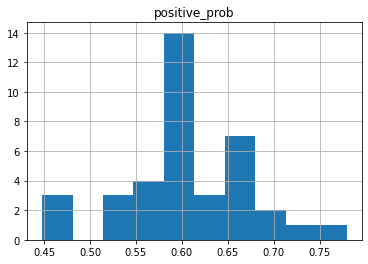

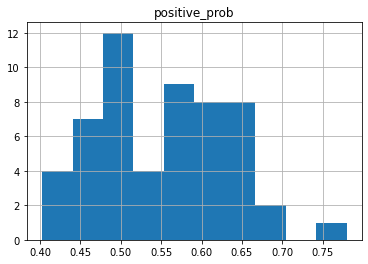

In [770]:
predicted_new_probs_df[predicted_new_probs_df.true_ent == 1][['positive_prob']].hist()
predicted_new_probs_df[predicted_new_probs_df.true_ent == 0][['positive_prob']].hist()

In [942]:
predicted_phrases[predicted_phrases.true_ent == 1][['positive_prob']].mean()- predicted_phrases[predicted_phrases.true_ent == 0][['positive_prob']].mean()

positive_prob    0.169249
dtype: float64

In [927]:
filter_prompt2 = """Does the phrase "regurgitation" refer to a disease?
No

Does the phrase "retinal toxicity" refer to a disease?
Yes

Does the phrase "hypotension" refer to a disease?
Yes

Does the phrase "intracarotid injection" refer to a disease?
No

Does the phrase "diabetic autonomic neuropathy" refer to a disease?
Yes

Does the phrase "amphetamine" refer to a disease?
No"""

In [930]:
predicted_phrases.phrase.values

array(['enzyme - mediated immunoassay methodology', 'mwm', 'syncope',
       'edema', 'angiographies', 'hyperthermia', 'locomotor activity',
       'cirazoline', 'prazosin', 'shr', 'thromboembolism',
       'fasciculation', 'seizures', 'lmwh administration',
       'hemolytic anemia', 'interstitial nephritis', 'neuraxial morphine',
       'aortic occlusion', 'spinal motor neurons', 'nmda receptors',
       'sedation', 'dexmedetomidine', 'pentobarbital', 'recovery time',
       'iop', 'iop lowering medication', 'iop lowering surgeries',
       'aortic regurgitation', 'wilms tumor', 'left kidney',
       'postoperative irradiation', 'hepatomas',
       'hyperplastic preneoplastic liver lesions', 'aplastic anemia',
       'topical administration', 'ophthalmic chloramphenicol',
       'dyskinesias', "parkinsonian ' off ' signs",
       'levodopa responsiveness', 'lymphoma', 'mast cell tumour',
       'brain tumour', 'histiocytic tumours', 'epit',
       'coronary artery disease', 'stroke',

In [931]:
entity_probs = run_gpt3_ner_post_filtering(engine, filter_prompt2, template_prompt, predicted_phrases.phrase.values)

In [936]:
entity_probs_df = pd.DataFrame([(e[0],e[1][0],e[1][1]) for e in entity_probs.items()],columns=['phrase','n','p'])

In [937]:
entity_probs_df

,phrase,n,p
0,enzyme - mediated immunoassay methodology,0.737625,0.262375
1,mwm,0.767854,0.232146
2,syncope,0.483890,0.516110
3,edema,0.365836,0.634164
4,angiographies,0.760444,0.239556
5,hyperthermia,0.426617,0.573383
6,locomotor activity,0.580042,0.419958
7,cirazoline,0.811176,0.188824
8,prazosin,0.709296,0.290704
9,shr,0.695700,0.304300


In [940]:
entity_probs_df = predicted_phrases.merge(entity_probs_df,on='phrase',how='inner')

In [943]:
entity_probs_df[entity_probs_df.true_ent == 1][['p']].mean() - entity_probs_df[entity_probs_df.true_ent == 0][['p']].mean()

p    0.229289
dtype: float64

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-e0e2b19ddc08>, line 10)